# Crear Grafo

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import math

In [2]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [3]:
def crearGrafoVersion1(n):
  t = [[] for i in range(n**2)]
  for i in range(n**2):
    if i == 0:
      t[i].append([i,i+1])
      t[i].append([i,i+n])
    elif i in range(1,n-1):
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i+n])
    elif i == n-1:
      t[i].append([i,i-1])
      t[i].append([i,i+n])
    elif i%n == 0 and i != 0 and i != n*(n-1):
      t[i].append([i,i+1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])
    elif (i+1)%n == 0 and i != n-1 and i != (n**2)-1:
      t[i].append([i,i-1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])
    elif i == n*(n-1):
      t[i].append([i,i+1])
      t[i].append([i,i-n])
    elif i in range(n*(n-1)+1,(n**2)-1):
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i-n])
    elif i == (n**2)-1:
      t[i].append([i,i-1])
      t[i].append([i,i-n])
    else:
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])

  return t

In [4]:
t = crearGrafoVersion1(10)
t

[[[0, 1], [0, 10]],
 [[1, 0], [1, 2], [1, 11]],
 [[2, 1], [2, 3], [2, 12]],
 [[3, 2], [3, 4], [3, 13]],
 [[4, 3], [4, 5], [4, 14]],
 [[5, 4], [5, 6], [5, 15]],
 [[6, 5], [6, 7], [6, 16]],
 [[7, 6], [7, 8], [7, 17]],
 [[8, 7], [8, 9], [8, 18]],
 [[9, 8], [9, 19]],
 [[10, 11], [10, 20], [10, 0]],
 [[11, 10], [11, 12], [11, 21], [11, 1]],
 [[12, 11], [12, 13], [12, 22], [12, 2]],
 [[13, 12], [13, 14], [13, 23], [13, 3]],
 [[14, 13], [14, 15], [14, 24], [14, 4]],
 [[15, 14], [15, 16], [15, 25], [15, 5]],
 [[16, 15], [16, 17], [16, 26], [16, 6]],
 [[17, 16], [17, 18], [17, 27], [17, 7]],
 [[18, 17], [18, 19], [18, 28], [18, 8]],
 [[19, 18], [19, 29], [19, 9]],
 [[20, 21], [20, 30], [20, 10]],
 [[21, 20], [21, 22], [21, 31], [21, 11]],
 [[22, 21], [22, 23], [22, 32], [22, 12]],
 [[23, 22], [23, 24], [23, 33], [23, 13]],
 [[24, 23], [24, 25], [24, 34], [24, 14]],
 [[25, 24], [25, 26], [25, 35], [25, 15]],
 [[26, 25], [26, 27], [26, 36], [26, 16]],
 [[27, 26], [27, 28], [27, 37], [27, 17]],
 [

In [5]:
fichero = open("1.txt", 'w')
for i in range(len(t)):
    for j in range(len(t[i])):
      fichero.write(str(t[i][j][1]) + '|1' + " ")
    fichero.write('\n')
fichero.close()

 0: [(1, 1), (10, 1)]
 1: [(0, 1), (2, 1), (11, 1)]
 2: [(1, 1), (3, 1), (12, 1)]
 3: [(2, 1), (4, 1), (13, 1)]
 4: [(3, 1), (5, 1), (14, 1)]
 5: [(4, 1), (6, 1), (15, 1)]
 6: [(5, 1), (7, 1), (16, 1)]
 7: [(6, 1), (8, 1), (17, 1)]
 8: [(7, 1), (9, 1), (18, 1)]
 9: [(8, 1), (19, 1)]
10: [(11, 1), (20, 1), (0, 1)]
11: [(10, 1), (12, 1), (21, 1), (1, 1)]
12: [(11, 1), (13, 1), (22, 1), (2, 1)]
13: [(12, 1), (14, 1), (23, 1), (3, 1)]
14: [(13, 1), (15, 1), (24, 1), (4, 1)]
15: [(14, 1), (16, 1), (25, 1), (5, 1)]
16: [(15, 1), (17, 1), (26, 1), (6, 1)]
17: [(16, 1), (18, 1), (27, 1), (7, 1)]
18: [(17, 1), (19, 1), (28, 1), (8, 1)]
19: [(18, 1), (29, 1), (9, 1)]
20: [(21, 1), (30, 1), (10, 1)]
21: [(20, 1), (22, 1), (31, 1), (11, 1)]
22: [(21, 1), (23, 1), (32, 1), (12, 1)]
23: [(22, 1), (24, 1), (33, 1), (13, 1)]
24: [(23, 1), (25, 1), (34, 1), (14, 1)]
25: [(24, 1), (26, 1), (35, 1), (15, 1)]
26: [(25, 1), (27, 1), (36, 1), (16, 1)]
27: [(26, 1), (28, 1), (37, 1), (17, 1)]
28: [(27, 1), (

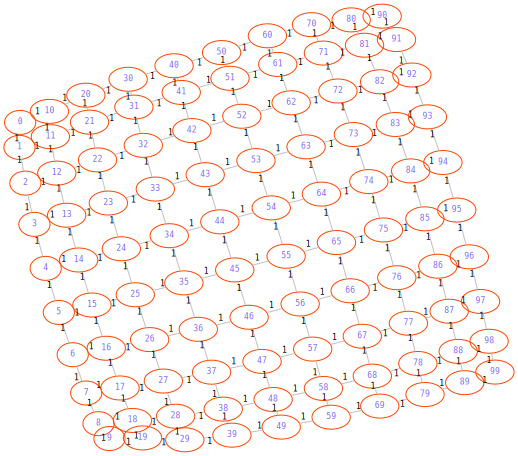

In [6]:
G, _ = readAdjl("1.txt", weighted=True) ##Cuando quiera leer de otro archivo .txt cambia el nombre de "1.txt" x el de tu archivo
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G, weighted=True)

# Algoritmo de Dijkstra

In [ ]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [None]*n
  cost = [math.inf]*n
  cost[s] = 0
  queue = [(0, s)]
  while queue:
    g_u, u = hq.heappop(queue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        f = g_u + w
        if f < cost[v]:
          cost[v] = f
          path[v] = u
          hq.heappush(queue, (f, v))

  return path, cost

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


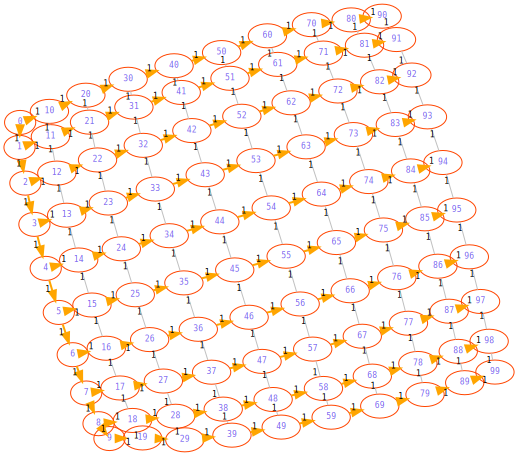

In [ ]:
dpath, cost = dijkstra(G, 0)
print(dpath)
adjlShow(G, weighted=True, path=dpath)

# Algoritmo Dijkstra Punto a Punto

In [7]:
def dijkstraPointToPoint(G, s, t):
  n = len(G)
  visited = [False]*n
  path = [None]*n
  cost = [math.inf]*n
  cost[s] = 0
  queue = [(0, s)]
  while queue and visited[t] == False:
    g_u, u = hq.heappop(queue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        f = g_u + w
        if f < cost[v]:
          cost[v] = f
          path[v] = u
          hq.heappush(queue, (f, v))

  return path, cost, visited, cost[t]

In [28]:
def showInfo(G, source, target):
  path, cost, _, _ = dijkstraPointToPoint(G, source, target)
  t = target
  targetPath = []
  targetPath.append(target)
  targetPath.append(path[t])
  while path[t] != source:
    t = path[t]
    targetPath.append(path[t])

  truePath = path
  for i in range(len(truePath)):
    if i not in targetPath and i != target:
      truePath[i] = None 

  return targetPath, cost[target], truePath

[34, 33, 32, 42, 52, 62, 72]
6


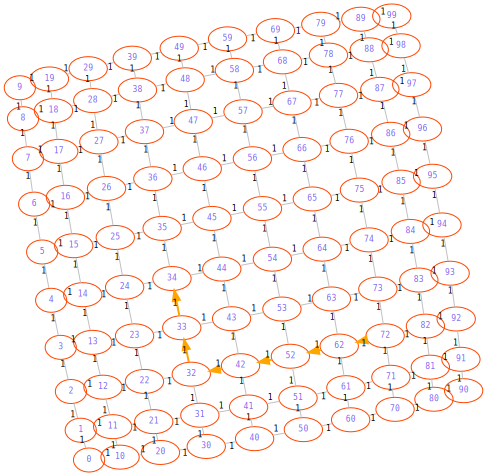

In [30]:
path, cost, tPath = showInfo(G, 72, 34)
print(path)
print(cost)
adjlShow(G, weighted=True, path=tPath)